# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/code/dereckhelms/cs39aa-project-dh)

Colab link is a work in progress





## 1. Preparation of Data
While preparing the data, I identified the features or inputs as 'age', 'bmi' and 'smoker'. Although there were other factors that I could use in my analysis I deemed these as most important. The features that were not categorical were mapped to binary outputs, 1 corresponding to yes, 0 realating to no.
The charges were then mapped to y and this would be predicted by the model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']

## 2. Splitting and Training the Data
The data was then split and trained using a Random Forest with state 42 to ensure that the data could be reproduced. A training and testing set was created with an 80/20 split. To ensure that a large amount of my dataset was left for training, and given my small sample size, I decided that 20% was a good amount to test with.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, alpha=0.7, color='blue', label='Actual Charges')
plt.scatter(X_test['bmi'], y_pred, alpha=0.7, color='red', label='Predicted Charges')
plt.title('BMI vs Charges (Random Forest Predictions)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


## 2. Exploratory Data Analysis

I am going to attempt to load the data into a pandas dataframe and see the age range of patients. I think it is an important step since the next necessary step would be to see if there is a correlation between age and smoking before I dig into whether the patient is a man or woman and smokes. 


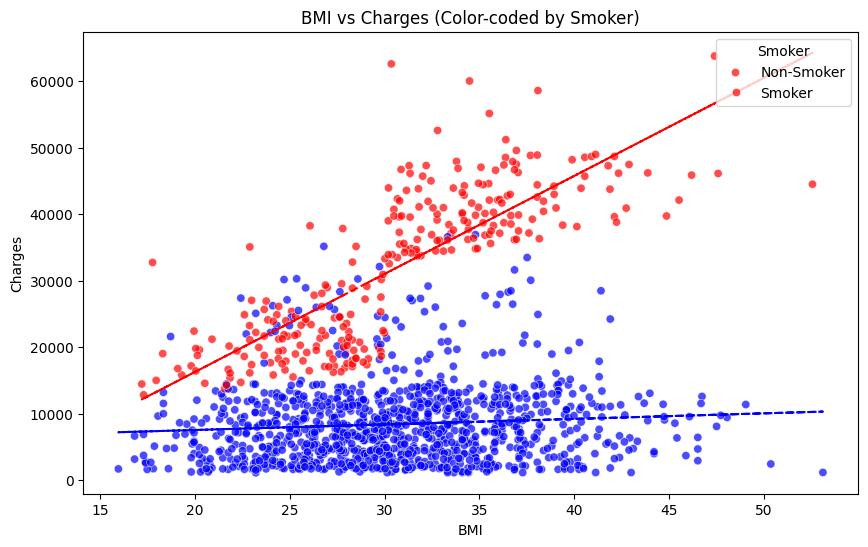

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('insurance.csv')  

# Create a scatter plot with color-coded smokers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, alpha=0.7, palette={'yes': 'red', 'no': 'blue'})
plt.title('BMI vs Charges (Color-coded by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Generate linear regression line for smokers
smoker_data = data[data['smoker'] == 'yes']
regression_smoker = LinearRegression().fit(smoker_data[['bmi']], smoker_data['charges'])
plt.plot(smoker_data['bmi'], regression_smoker.predict(smoker_data[['bmi']]), color='red', linestyle='--')

# Generate linear regression line for non-smokers
non_smoker_data = data[data['smoker'] == 'no']
regression_non_smoker = LinearRegression().fit(non_smoker_data[['bmi']], non_smoker_data['charges'])
plt.plot(non_smoker_data['bmi'], regression_non_smoker.predict(non_smoker_data[['bmi']]), color='blue', linestyle='--')

plt.legend(title='Smoker', loc='upper right', labels=['Non-Smoker', 'Smoker'])
plt.show()



Note: In this code non-smoker should be in red and smoker should be in blue. I am not sure why the colors are reversed. 

Using this linear regression model one can observer that the insurance charges for a smoker are much higher than that of a non-smoker; hence, the slope of the linear regression for non-smokers is much flatter. 

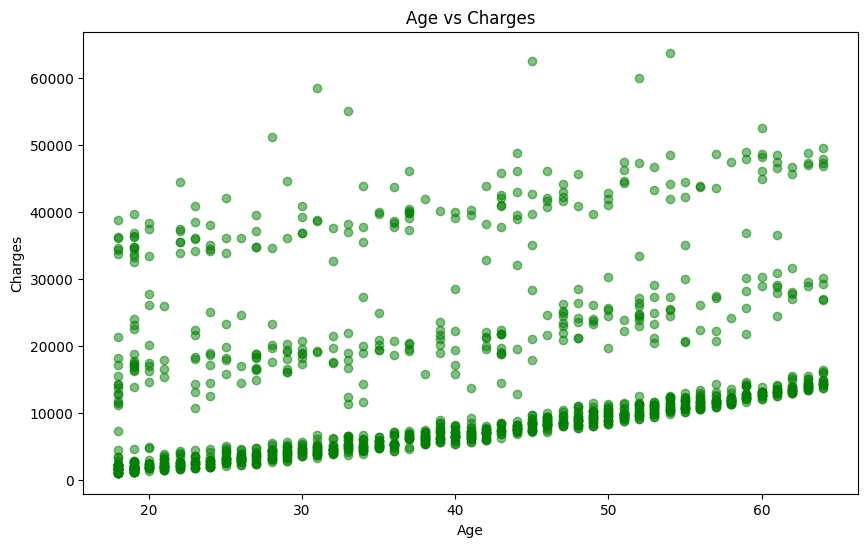

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Plot a scatter plot of Age vs Charges
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['charges'], alpha=0.5, color='green')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


With some outliers, which maybe related to smoker and BMI factors, there is a clear increase in charges as one increases. 

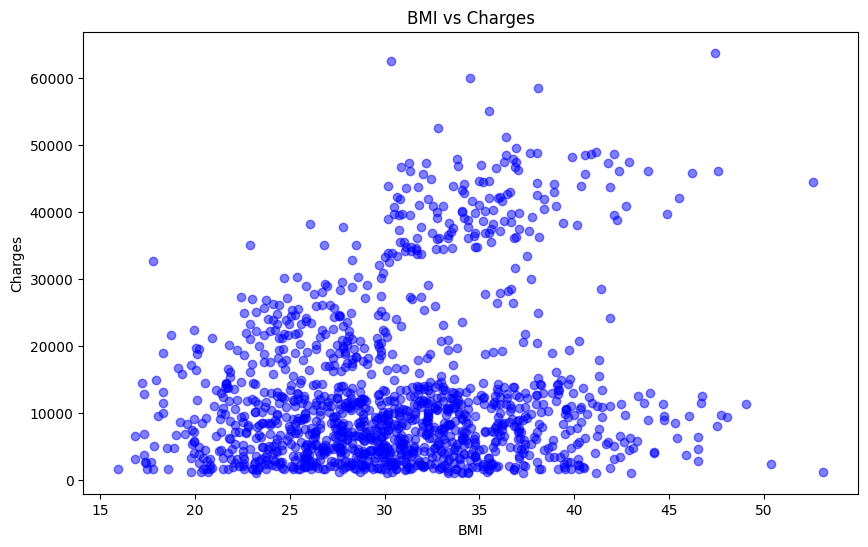

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Plot a scatter plot of BMI vs Charges
plt.figure(figsize=(10, 6))
plt.scatter(data['bmi'], data['charges'], alpha=0.5, color='blue')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


It would seem, as I hypothesized below, that a higher BMI correlates to higher insurance charges. There are probably other factors that do not explain why some people with lower BMI have high insurance charges. 

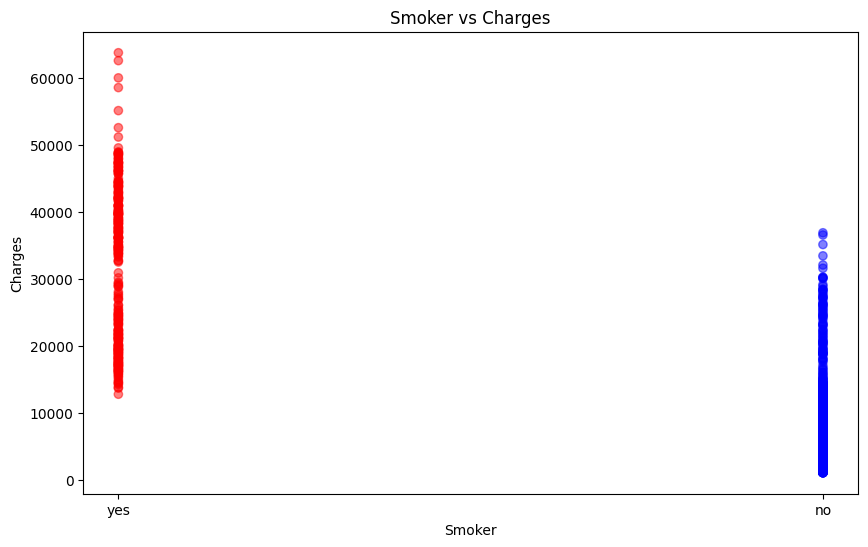

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Plot a scatter plot of Smoker vs Charges
plt.figure(figsize=(10, 6))
colors = {'yes': 'red', 'no': 'blue'}  # Assigning colors based on smoker status
plt.scatter(data['smoker'], data['charges'], alpha=0.5, color=[colors[i] for i in data['smoker']])
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


The group of smokers, the yes category or category in red, clearly has higher charges than the group of non smokers. 

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Number of Rows: 1338
Number of Columns: 7

Size of the Dataset: 9366

First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.8

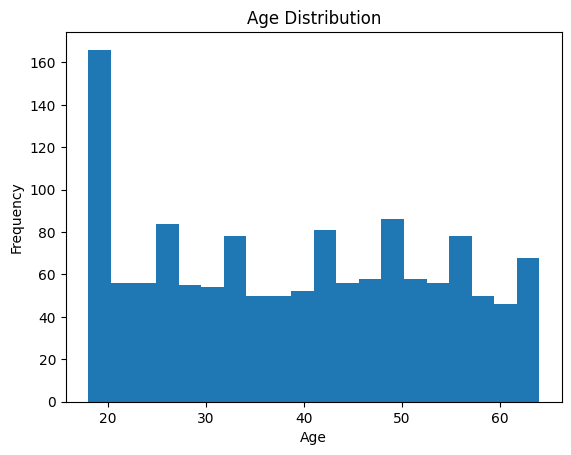

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance.csv')  # getting insurance dataset
# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Display the number of rows and columns
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

# Display the size of the dataset (number of elements)
dataset_size = num_rows * num_cols
print("\nSize of the Dataset:", dataset_size)

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Perform simple data analysis
print("\nStatistics:")
print(data.describe())

# Visualize data (you may need to install matplotlib for this)
import matplotlib.pyplot as plt

data['age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


It would seem that the mode appears to be approximately 18 years old. I now plan to investigate how a younger age correlates with the price generated from the model and what a Random Forest model would predict for a younger individual. 

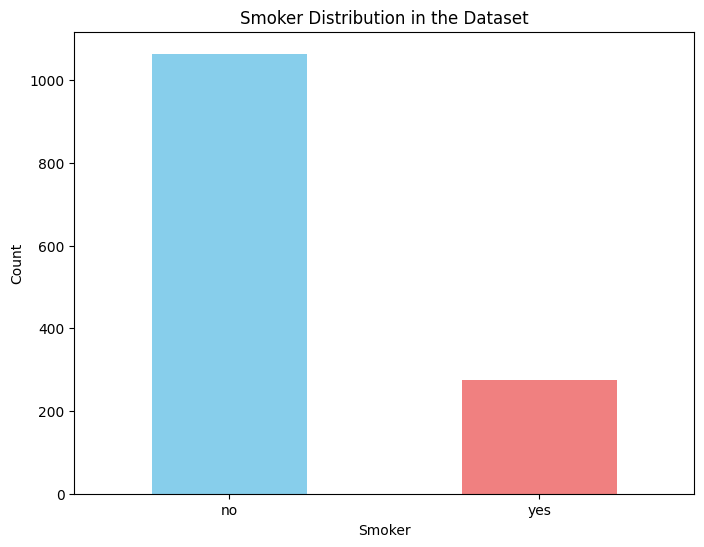

Smoker Distribution:
smoker
no     1064
yes     274
Name: count, dtype: int64

Percentage of Smokers: 20.47832585949178 %


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display the distribution of smokers
smoker_counts = data['smoker'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
smoker_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Smoker Distribution in the Dataset')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of smokers
print("Smoker Distribution:")
print(smoker_counts)

# Calculate the percentage of smokers
total_count = data.shape[0]
smoker_percentage = (smoker_counts['yes'] / total_count) * 100
print("\nPercentage of Smokers:", smoker_percentage, "%")


Smokers are in the minority in this dataset. I hypothesize that a Random Forest will predict a higher charge for smokers than non-smokers.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Number of Rows: 1338
Number of Columns: 7

Size of the Dataset: 9366


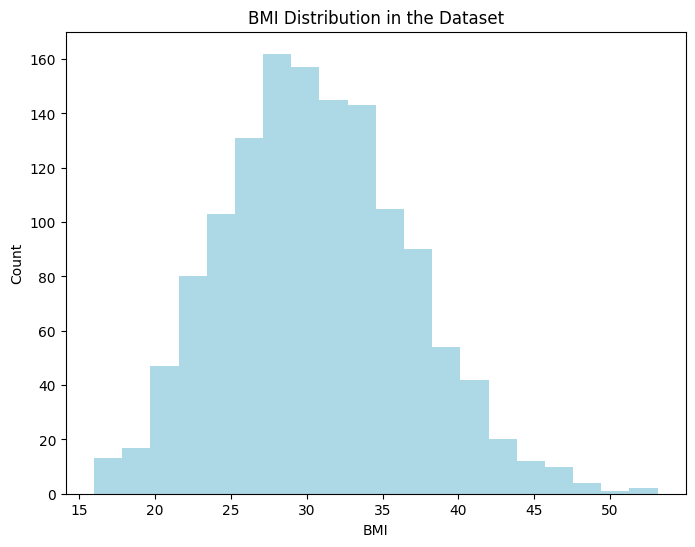


BMI Statistics:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Display the number of rows and columns
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

# Display the size of the dataset (number of elements)
dataset_size = num_rows * num_cols
print("\nSize of the Dataset:", dataset_size)

# Display the distribution of BMI
bmi_counts = data['bmi'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
data['bmi'].plot(kind='hist', bins=20, color='lightblue')
plt.title('BMI Distribution in the Dataset')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Display BMI statistics
print("\nBMI Statistics:")
print(data['bmi'].describe())


It would appear that the majority of the patients have a BMI under 34.69. In part 2 I will investigate if the max BMI increases one's healthcare insurance. 

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Number of Rows: 1338
Number of Columns: 7

Size of the Dataset: 9366


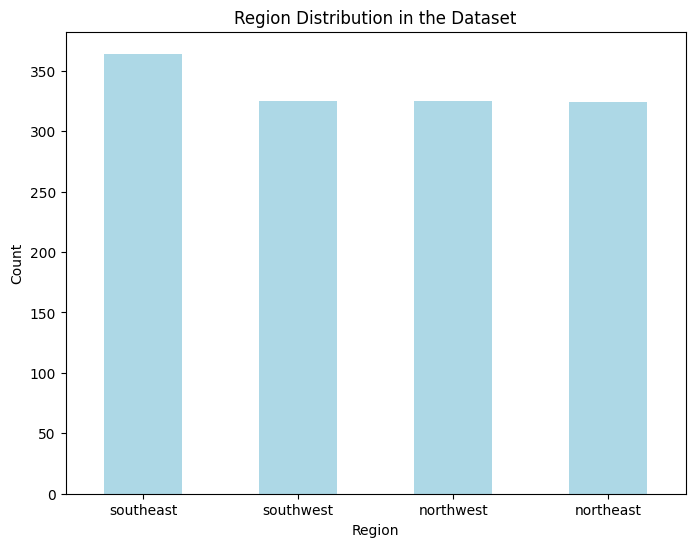


Region Counts:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Display the number of rows and columns
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

# Display the size of the dataset (number of elements)
dataset_size = num_rows * num_cols
print("\nSize of the Dataset:", dataset_size)

# Display the distribution of Region
region_counts = data['region'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='lightblue')
plt.title('Region Distribution in the Dataset')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()

# Display Region statistics
print("\nRegion Counts:")
print(region_counts)


The region section is vague and needs more clarification which I will have to obtain by contacting the dataset creator. I am unsure if this data will be used in my model. 

One can also see that there and 7 columns leading to the size of 9366. Since this is a relatively small dataset, I should have no issues with loading this data into kaggle or other models that may perform worse with size.

Analysis of the charges section

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Number of Rows: 1338
Number of Columns: 7

Size of the Dataset: 9366


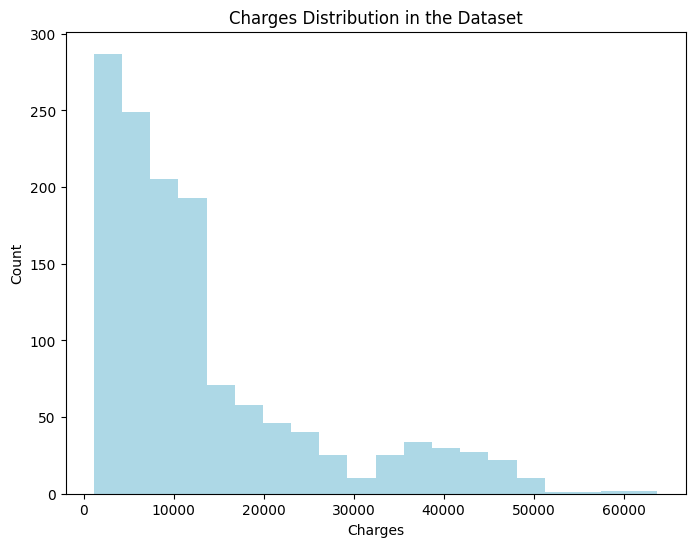


Charges Statistics:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('insurance.csv')  # Replace 'insurance.csv' with the actual filename

# Display basic information about the dataset
print("Data Info:")
print(data.info())

# Display the number of rows and columns
num_rows, num_cols = data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

# Display the size of the dataset (number of elements)
dataset_size = num_rows * num_cols
print("\nSize of the Dataset:", dataset_size)

# Display the distribution of Charges
charges_counts = data['charges'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
data['charges'].plot(kind='hist', bins=20, color='lightblue')
plt.title('Charges Distribution in the Dataset')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

# Display Charges statistics
print("\nCharges Statistics:")
print(data['charges'].describe())


I hypothesize that the higher charges, 50000 come from smokers and others that bear a greater risk to the insurance company. I will investigate this in part 2.